In [1]:
import torch
from torch import nn
from torch.optim import Adam
import matplotlib.pyplot as plt
from tqdm import tqdm

## examples of training a linear neural network for generating

### Training on correct linear relationship

Text(0, 0.5, 'y')

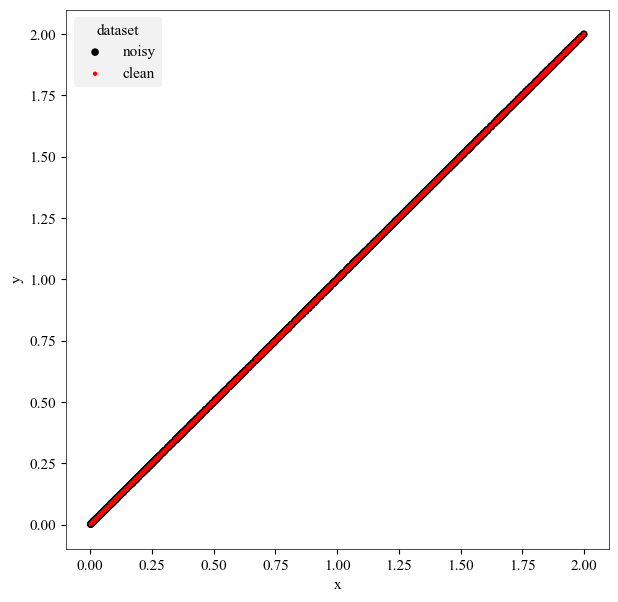

In [2]:
# Generate data

vector_size = 1000
noise_scale = 0
noise_vector = noise_scale * (2*torch.rand((vector_size, 1)) - 1)

funct = lambda x : x
x_vector = 2 * (torch.rand((vector_size, 1)))
y_vector = funct(x_vector) #** 2
data_vector = y_vector + noise_vector

plt.figure(figsize=(7,7))
plt.scatter(x_vector, data_vector, c='k', s=30, label='noisy')
plt.scatter(x_vector, y_vector, c='r', s=10, label='clean')
plt.legend(title='dataset')
plt.xlabel('x')
plt.ylabel('y')

100%|██████████| 1000/1000 [00:00<00:00, 7285.76it/s]


Text(0, 0.5, 'true - predicted y')

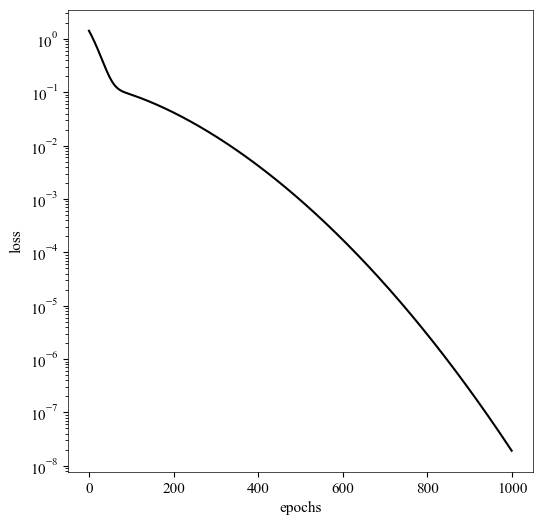

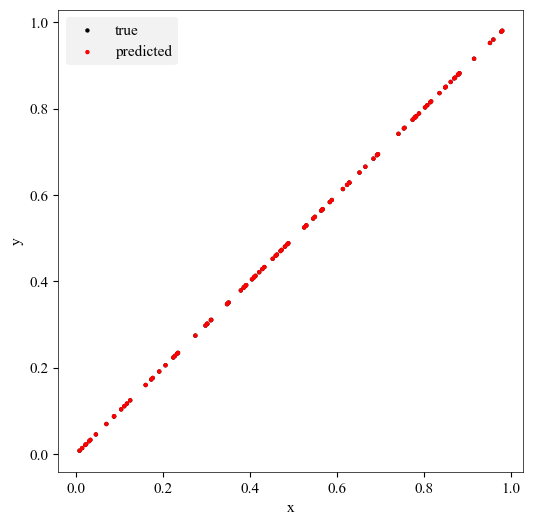

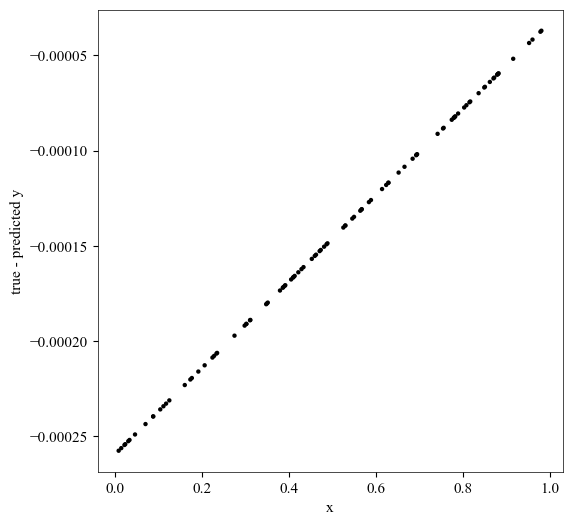

In [3]:
# initialize nn
linear_nn = nn.Linear(in_features = 1, out_features = 1)

training_steps = 1000
optimizer = Adam(linear_nn.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
loss_list = torch.zeros(training_steps)

# train nn
for i in tqdm(torch.arange(0, training_steps)):
    optimizer.zero_grad()
    output_vector = linear_nn(x_vector)
    loss = loss_fn(y_vector, output_vector)
    loss.backward()
    optimizer.step()
    loss_list[i] = loss



# PLOTS

# loss
plt.figure(figsize=(6,6))
plt.plot(loss_list.detach())
plt.xlabel('epochs')
plt.ylabel('loss')
plt.yscale('log')

random_x = torch.rand(100, 1)
# true - predicted
plt.figure(figsize=(6,6))
plt.scatter(random_x, funct(random_x), c='k', s=10, label='true')
plt.scatter(random_x, (linear_nn(random_x)).detach(), c='r',s=10, label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# difference
plt.figure(figsize=(6,6))
plt.scatter(random_x, funct(random_x) - (linear_nn(random_x)).detach(), c='k', s=10)
plt.xlabel('x')
plt.ylabel('true - predicted y')

### Training on noisy linear relationship

Text(0, 0.5, 'y')

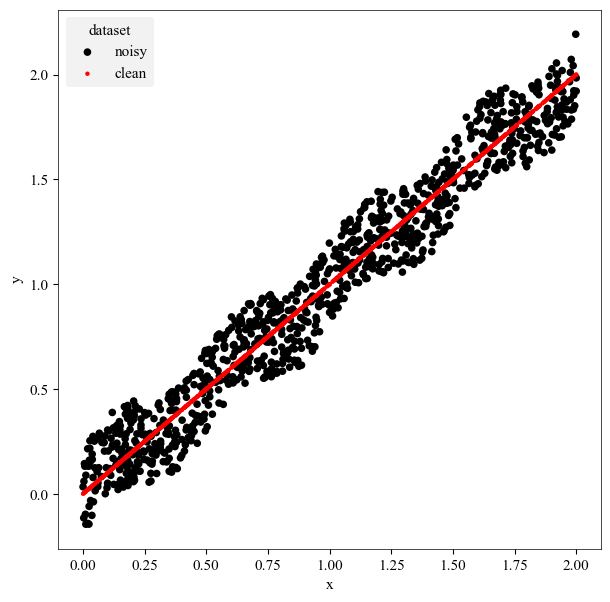

In [6]:
# Generate data

vector_size = 1000
noise_scale = 0.2
noise_vector = noise_scale * (2*torch.rand((vector_size, 1)) - 1)

trend = lambda x, amp, period,  : amp * torch.sin(2 * torch.pi * x / period)
funct = lambda x : x
x_vector = 2 * (torch.rand((vector_size, 1)))
y_vector = funct(x_vector) #** 2
data_vector = y_vector + noise_vector +  trend(x_vector, 0.075, period=0.5)

plt.figure(figsize=(7,7))
plt.scatter(x_vector, data_vector, c='k', s=30, label='noisy')
plt.scatter(x_vector, y_vector, c='r', s=10, label='clean')
plt.legend(title='dataset')
plt.xlabel('x')
plt.ylabel('y')

100%|██████████| 1000/1000 [00:00<00:00, 8184.71it/s]


Text(0, 0.5, 'true - predicted y')

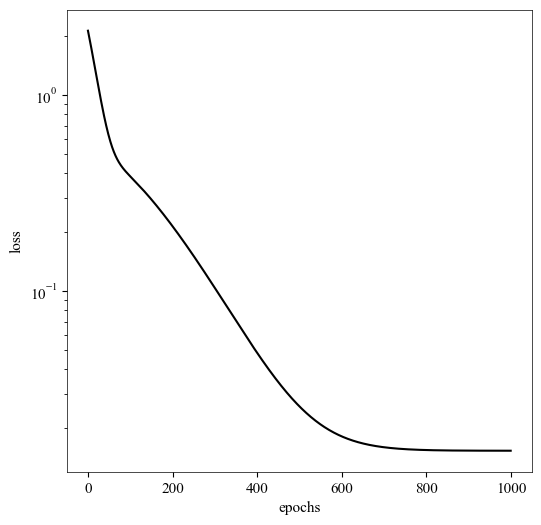

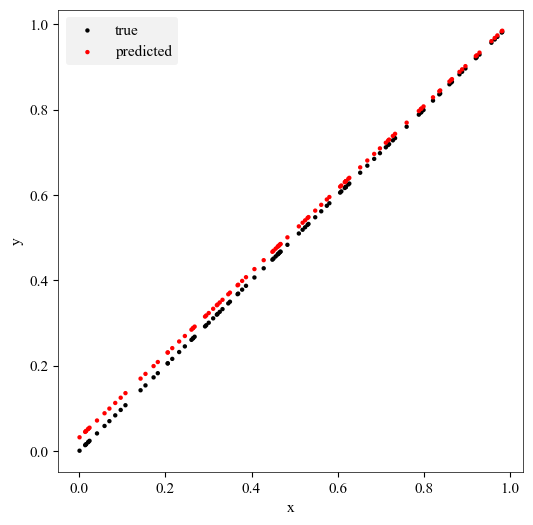

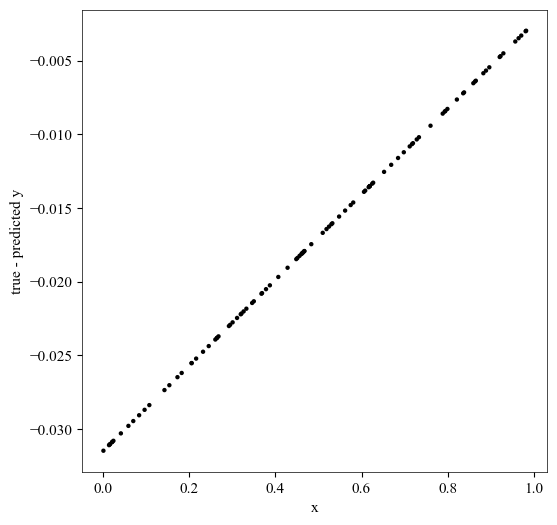

In [7]:
# initialize nn
linear_nn = nn.Linear(in_features = 1, out_features = 1)

training_steps = 1000
optimizer = Adam(linear_nn.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
loss_list = torch.zeros(training_steps)

# train nn
for i in tqdm(torch.arange(0, training_steps)):
    optimizer.zero_grad()
    output_vector = linear_nn(x_vector)
    loss = loss_fn(data_vector, output_vector)
    loss.backward()
    optimizer.step()
    loss_list[i] = loss



# PLOTS

# loss
plt.figure(figsize=(6,6))
plt.plot(loss_list.detach())
plt.xlabel('epochs')
plt.ylabel('loss')
plt.yscale('log')

random_x = torch.rand(100, 1)
# true - predicted
plt.figure(figsize=(6,6))
plt.scatter(random_x, funct(random_x), c='k', s=10, label='true')
plt.scatter(random_x, (linear_nn(random_x)).detach(), c='r',s=10, label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# difference
plt.figure(figsize=(6,6))
plt.scatter(random_x, funct(random_x) - (linear_nn(random_x)).detach(), c='k', s=10)
plt.xlabel('x')
plt.ylabel('true - predicted y')